<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [47]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [48]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [61]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [62]:
library(corrplot)

corrplot 0.84 loaded



# Importing the data

In [19]:
df = read.csv('https://raw.githubusercontent.com/Jlokkerbol/masterclass/main/student-por.csv')

In [20]:
head(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [21]:
class(df)

[1] "data.frame"

# Describing the data

In [22]:
str(df)

'data.frame':	649 obs. of  33 variables:
 $ school    : chr  "GP" "GP" "GP" "GP" ...
 $ sex       : chr  "F" "F" "F" "F" ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : chr  "U" "U" "U" "U" ...
 $ famsize   : chr  "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus   : chr  "A" "T" "T" "T" ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : chr  "at_home" "at_home" "at_home" "health" ...
 $ Fjob      : chr  "teacher" "other" "other" "services" ...
 $ reason    : chr  "course" "course" "other" "home" ...
 $ guardian  : chr  "mother" "father" "mother" "mother" ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : chr  "yes" "no" "yes" "no" ...
 $ famsup    : chr  "no" "yes" "no" "yes" ...
 $ paid      : chr  "no" "no" "no" "no" ...
 $ activities: chr  "no" "no" "no" "yes" ...
 $ nursery   : chr  "yes" "no" "yes" "yes" ...
 $ h

In [32]:
summary(df)

    school              sex                 age          address         
 Length:649         Length:649         Min.   :15.00   Length:649        
 Class :character   Class :character   1st Qu.:16.00   Class :character  
 Mode  :character   Mode  :character   Median :17.00   Mode  :character  
                                       Mean   :16.74                     
                                       3rd Qu.:18.00                     
                                       Max.   :22.00                     
   famsize            Pstatus               Medu            Fedu      
 Length:649         Length:649         Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median :2.000   Median :2.000  
                                       Mean   :2.515   Mean   :2.307  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   M

In [34]:
sapply(df, function(x) sum(is.na(x))) 

school        sex        age    address    famsize    Pstatus       Medu 
         0          0          0          0          0          0          0 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
         0          0          0          0          0          0          0 
  failures  schoolsup     famsup       paid activities    nursery     higher 
         0          0          0          0          0          0          0 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
         0          0          0          0          0          0          0 
    health   absences         G1         G2         G3 
         0          0          0          0          0

In [38]:
df <- df %>% mutate_if(is.character,as.factor)
head(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


In [40]:
summary(df)

 school   sex          age        address famsize   Pstatus      Medu      
 GP:423   F:383   Min.   :15.00   R:197   GT3:457   A: 80   Min.   :0.000  
 MS:226   M:266   1st Qu.:16.00   U:452   LE3:192   T:569   1st Qu.:2.000  
                  Median :17.00                             Median :2.000  
                  Mean   :16.74                             Mean   :2.515  
                  3rd Qu.:18.00                             3rd Qu.:4.000  
                  Max.   :22.00                             Max.   :4.000  
      Fedu             Mjob           Fjob            reason      guardian  
 Min.   :0.000   at_home :135   at_home : 42   course    :285   father:153  
 1st Qu.:1.000   health  : 48   health  : 23   home      :149   mother:455  
 Median :2.000   other   :258   other   :367   other     : 72   other : 41  
 Mean   :2.307   services:136   services:181   reputation:143               
 3rd Qu.:3.000   teacher : 72   teacher : 36                                
 Max. 

## Histrograms per variable to check distribution and outliers

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



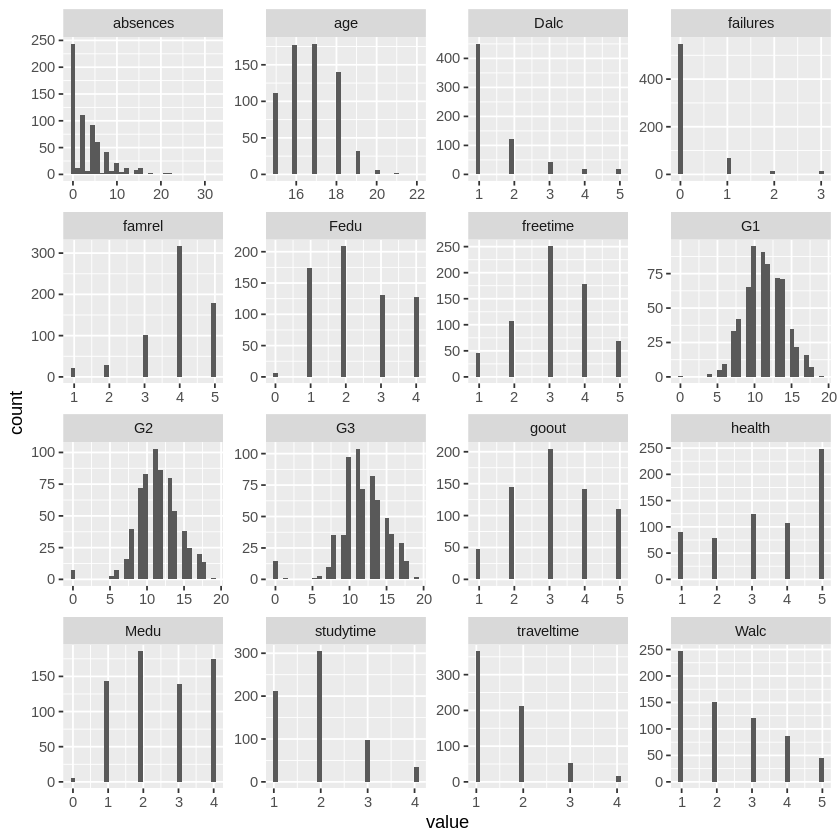

In [44]:
df %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) + facet_wrap(~ key, scales = "free") + geom_histogram()

## Identify near-zero variances predictors

In [50]:
nearZeroVar(df, saveMetrics = TRUE)

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
school,1.871681,0.3081664,FALSE,FALSE
sex,1.439850,0.3081664,FALSE,FALSE
age,1.011299,1.2326656,FALSE,FALSE
address,2.294416,0.3081664,FALSE,FALSE
famsize,2.380208,0.3081664,FALSE,FALSE
Pstatus,7.112500,0.3081664,FALSE,FALSE
Medu,1.062857,0.7704160,FALSE,FALSE
Fedu,1.201149,0.7704160,FALSE,FALSE
Mjob,1.897059,0.7704160,FALSE,FALSE


In [51]:
names(df)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

In [52]:
names(df)[which(names(df) == "health")]

[1] "health"

In [53]:
names(df)[which(names(df) == "health")] <- "Y"

In [54]:
names(df)

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "Y"          "absences"  
[31] "G1"         "G2"         "G3"

## Describe Y


  1   2   3   4   5 
 90  78 124 108 249 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   3.536   5.000   5.000 

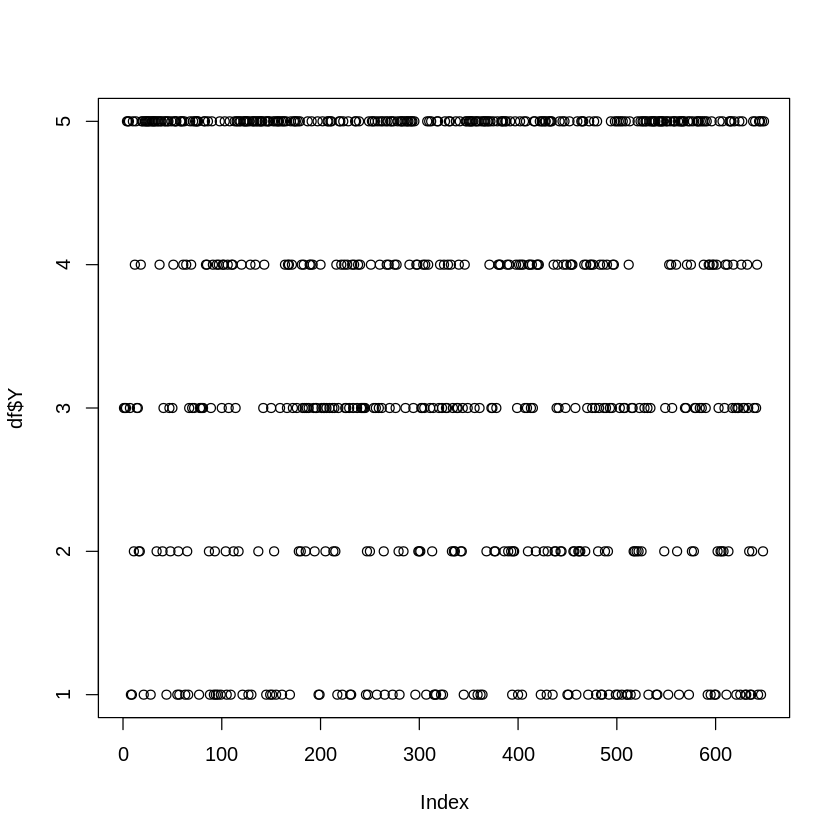

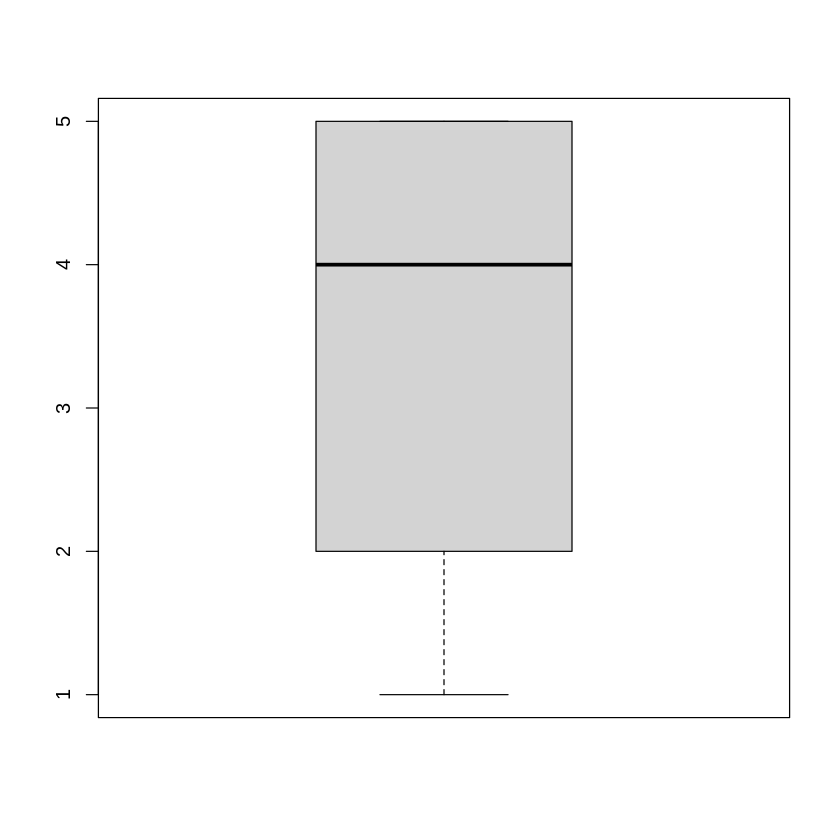

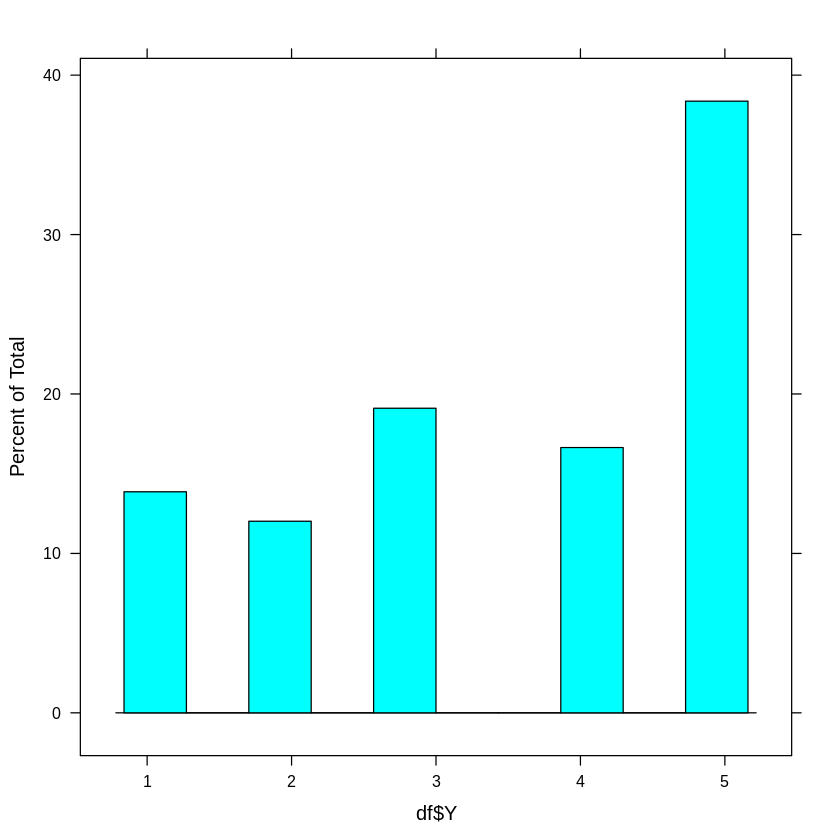

[1] 0

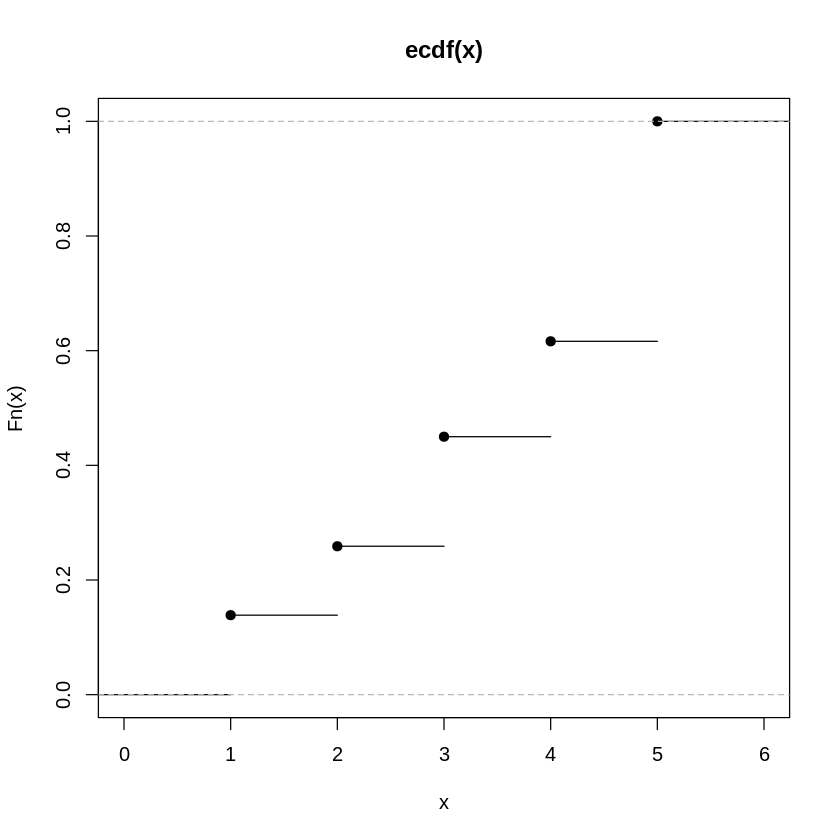

In [56]:
plot(df$Y)
table(df$Y)
summary(df$Y)
boxplot(df$Y)
histogram(df$Y)
plot.ecdf(df$Y)
sum(is.na(df$Y)) #nr of missings affect generalizability of your model

## define Y as a binary variable

In [59]:
df$Y[df$Y < 3.5] <- 0
df$Y[df$Y >= 3.5] <- 1

table(df$Y)


  0   1 
292 357 

## Correlation Matrix

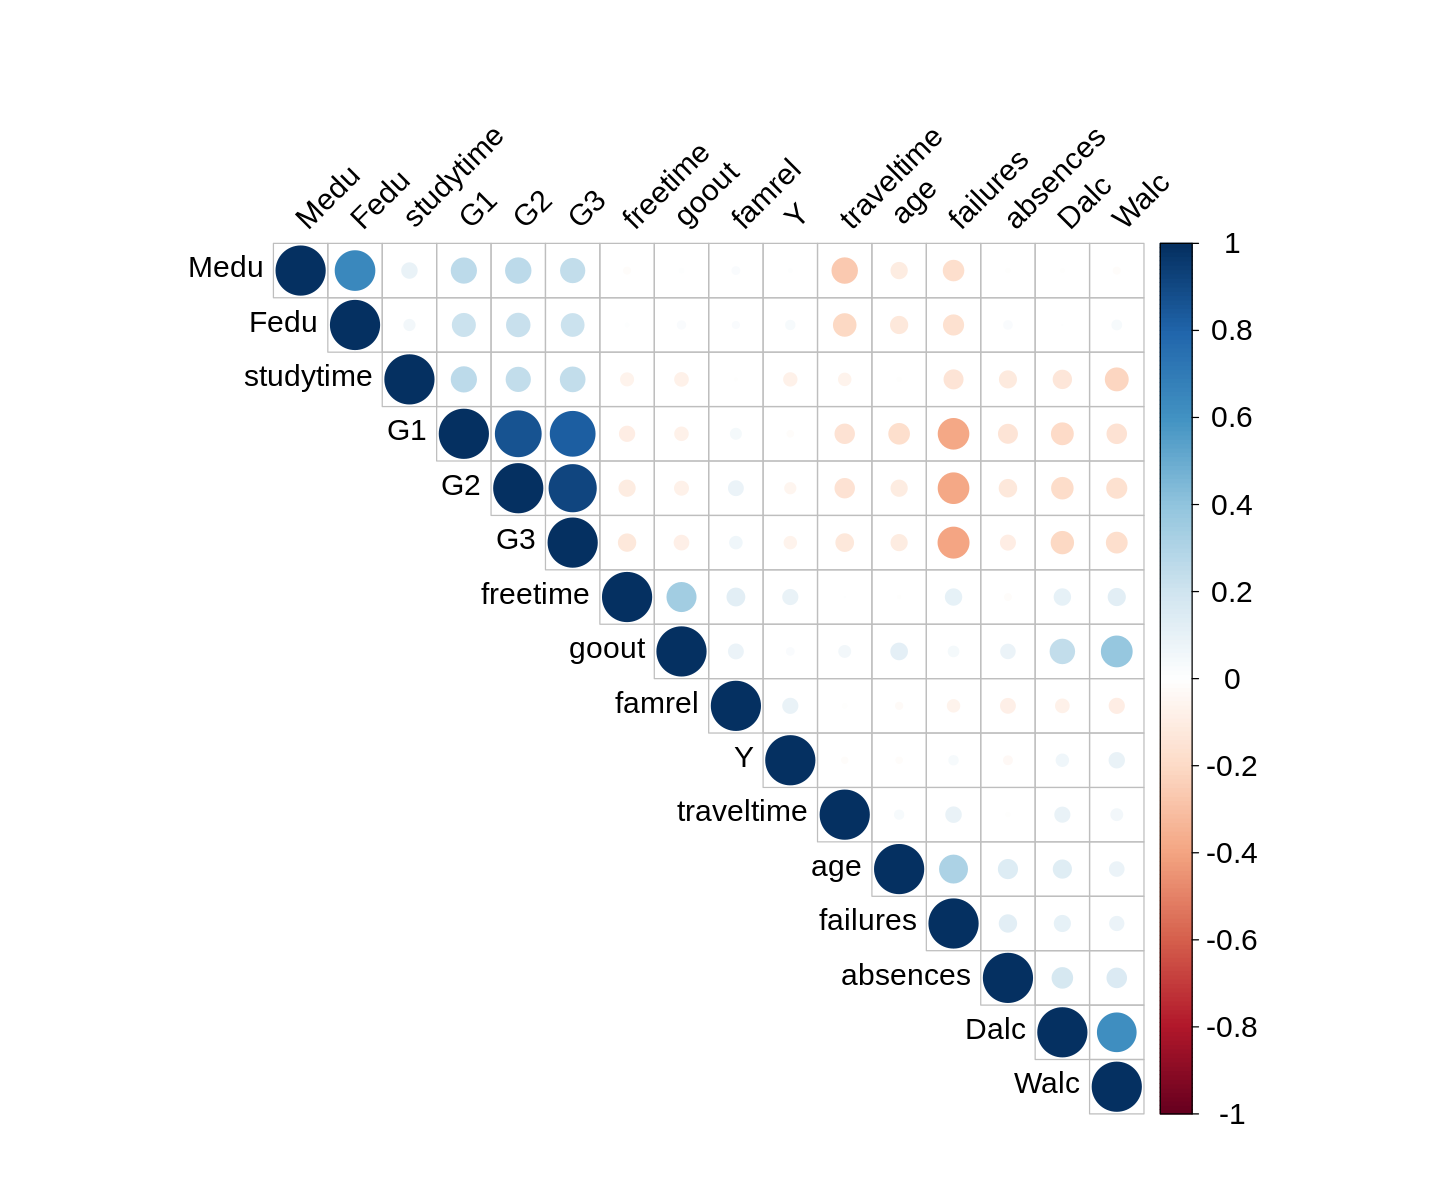

In [78]:
res <- cor(df[unlist(lapply(df, is.numeric))])
options(repr.plot.width=12, repr.plot.height=10)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45, tl.cex = 1.5, cl.cex = 1.5)

## Scatterplots for checking irregularities and non-linear relationships

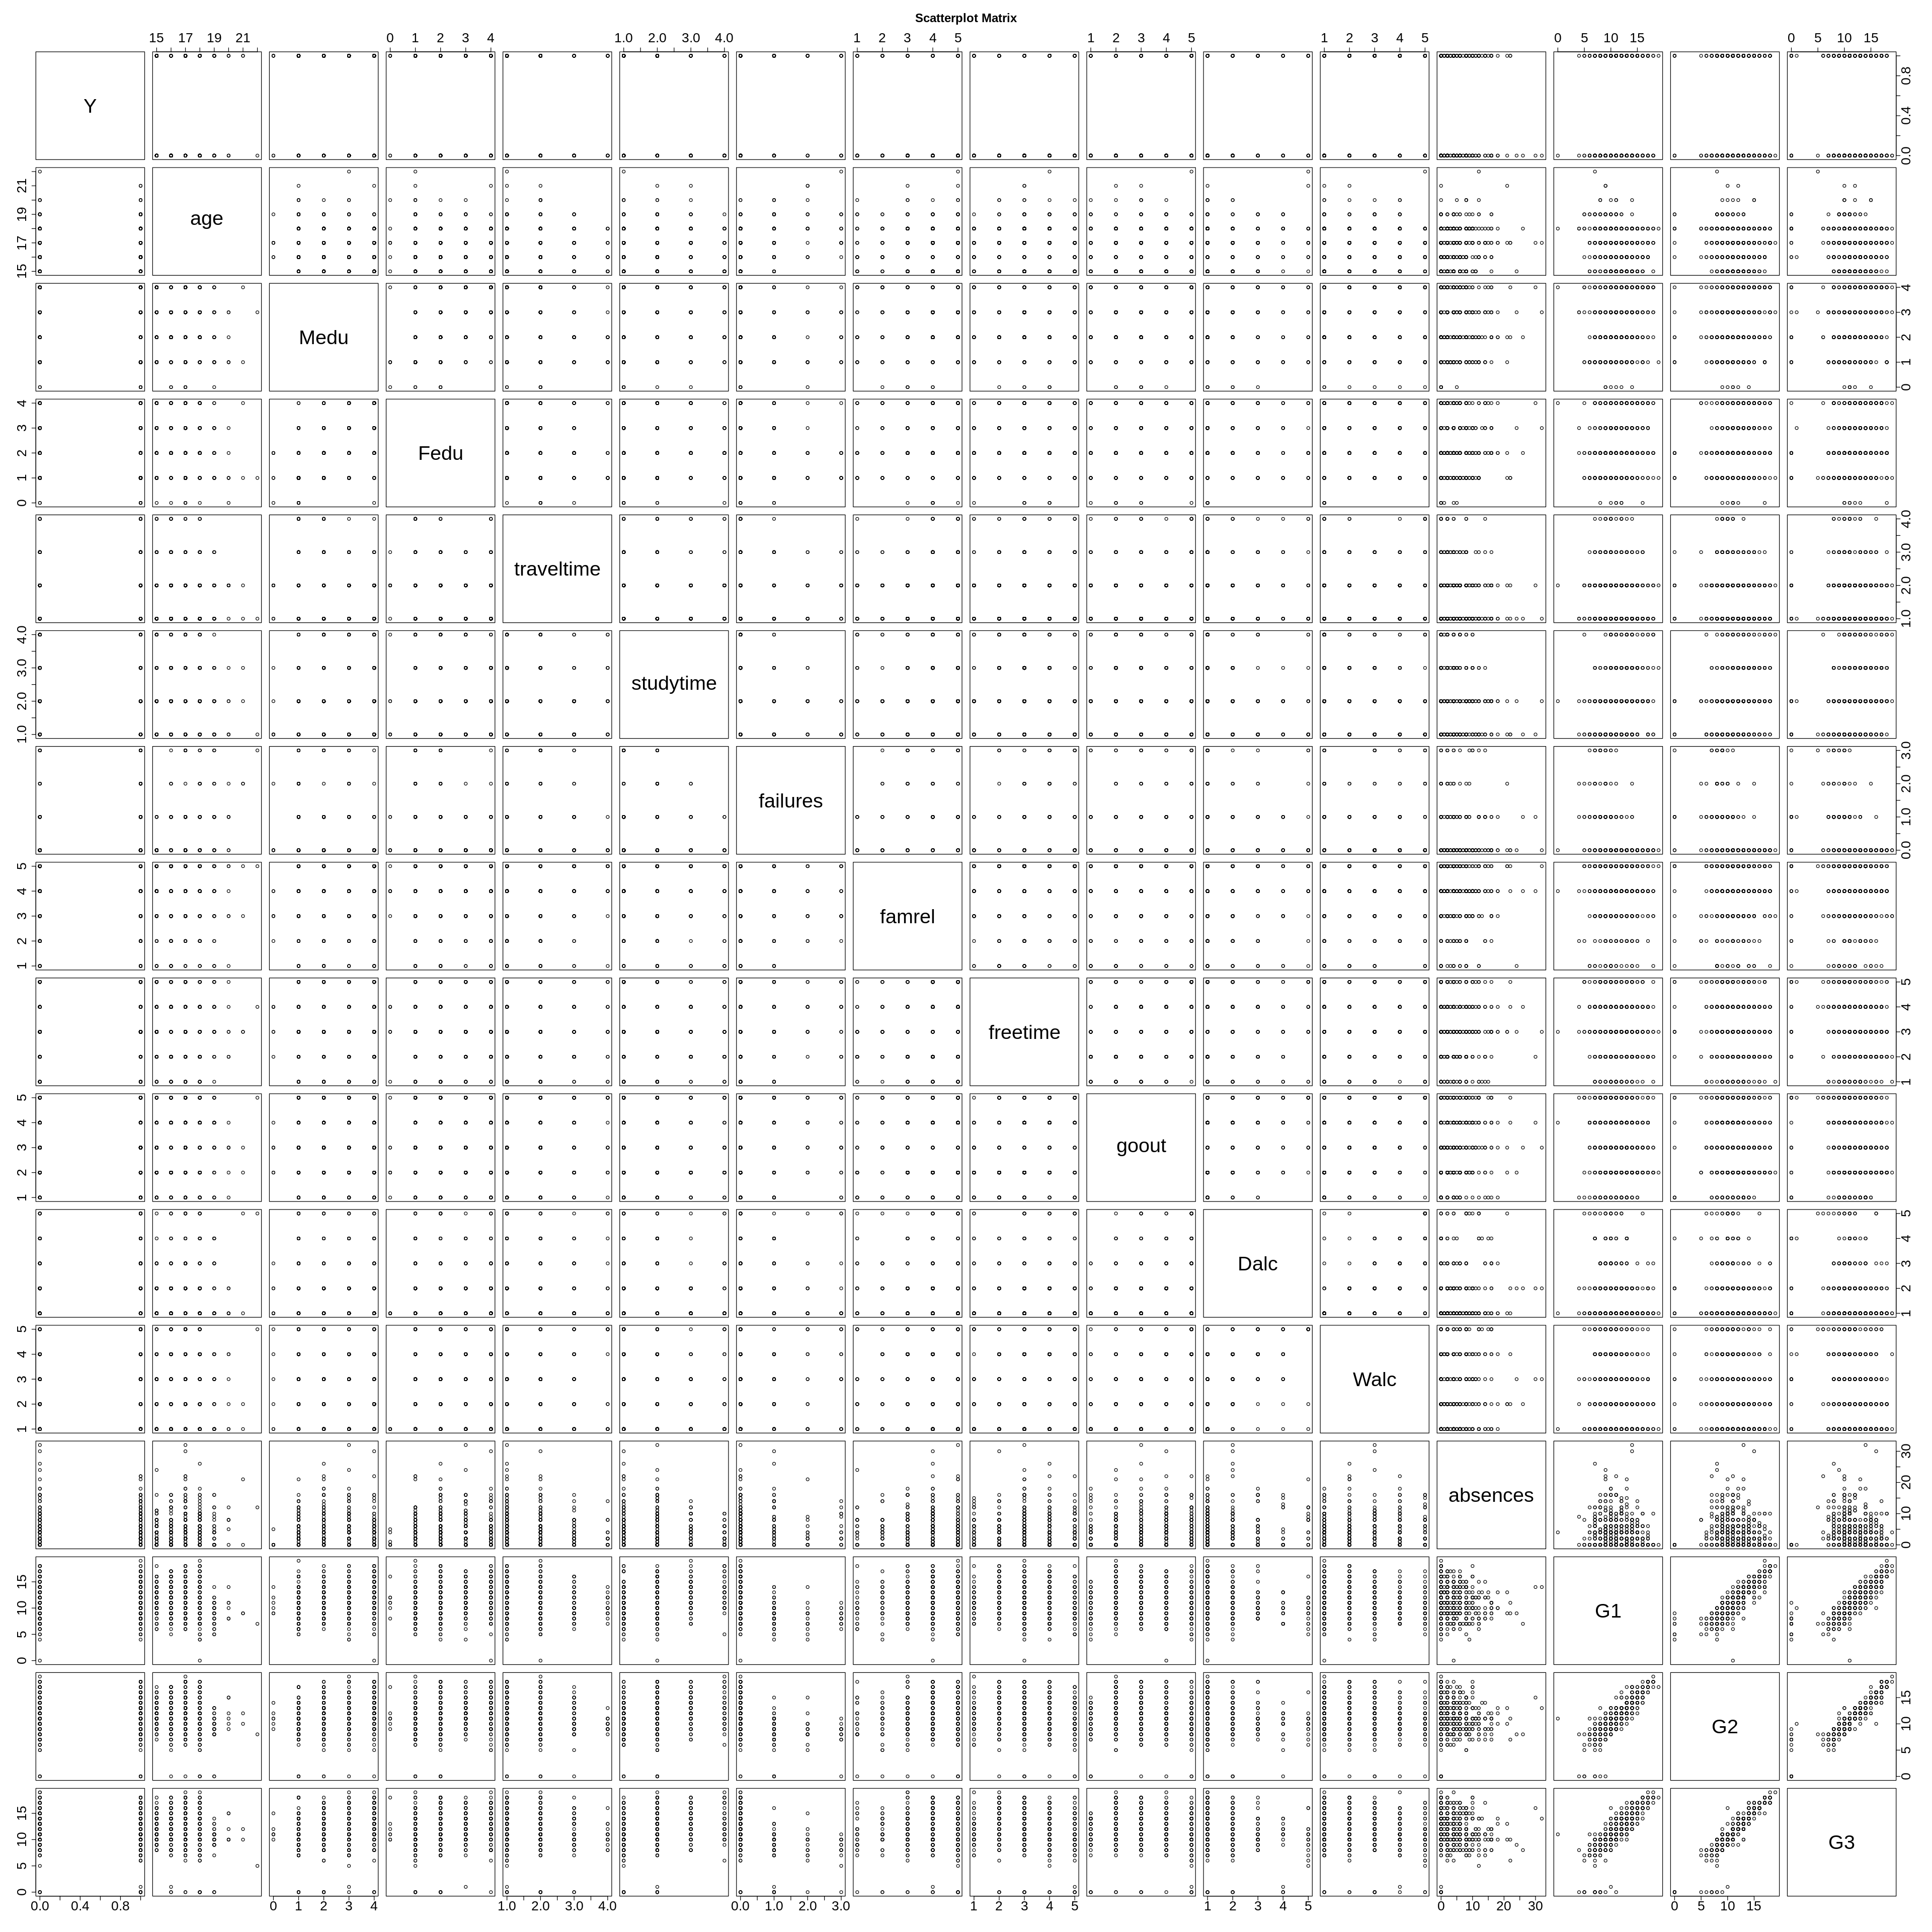

In [86]:
df_temp = df %>% keep(is.numeric)
options(repr.plot.width=ncol(df_temp)*2, repr.plot.height=ncol(df_temp)*2)
pairs(Y~.,data=df_temp, main="Scatterplot Matrix", cex.labels = 3, cex.axis = 2)

##Boxplots of categorical variables and Y

In [99]:
bp <- df %>% keep(is.factor)
bp <- cbind(bp, "Y" = df$Y)
head(bp)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,Y
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,0
2,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,0
3,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no,0
4,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes,1
5,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no,1
6,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,no,yes,yes,yes,yes,no,1


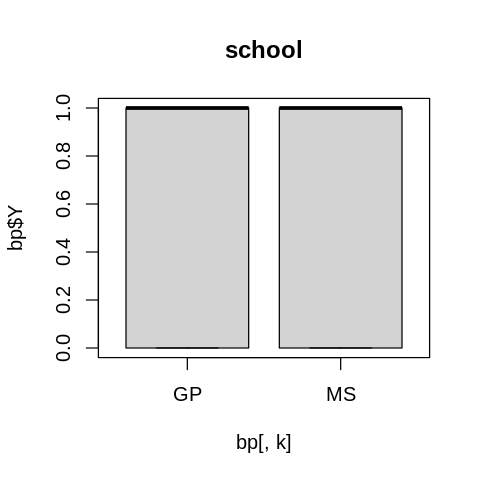

ERROR: ignored

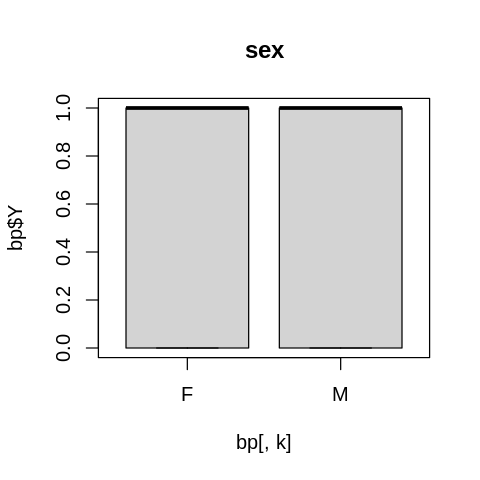

In [111]:
options(repr.plot.width=4, repr.plot.height=4)
par(mfrow = c(1, 1))
for(k in 1:17){
    boxplot(bp$Y ~ bp[, k], main = names(bp)[k])}